In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [37]:
df_name = '../data/df_pairCandidatesAfterMass_OnlyStellar_L205n1250.pkl'
df_name = '../data/df_pairCandidatesAfterMass_OnlyStellar_L75n1820.pkl'

In [38]:
df = pd.read_pickle(df_name)
print(len(df))

904


In [39]:
df[:1]

,DM_massA,DM_massB,Distance,ID_A,ID_B,Parent_A,Parent_B,Position_A,Position_B,Radial_vel,Stellar_massA,Stellar_massB,Tan_vel,v_Rad,v_Tan
0,6.259729e+11,2.148218e+13,1252.1649,538624,259114,2999,94,"[107.8576, 8905.8584, 31395.8203]","[355.805, 10065.4629, 30993.6309]",-232.2016,1.021445e+10,9.615874e+10,309.4184,"[4.38004, 73.1419, -220.338]","[-5.83658, -97.4646, 293.609]"


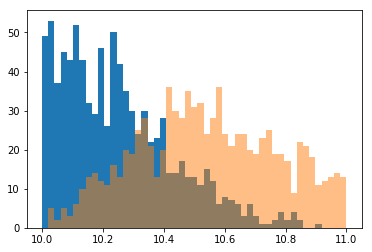

In [40]:
_ = plt.hist(np.log10(df['Stellar_massA']), bins=np.linspace(10,11,50))
_ = plt.hist(np.log10(df['Stellar_massB']), alpha=0.5, bins=np.linspace(10,11,50))

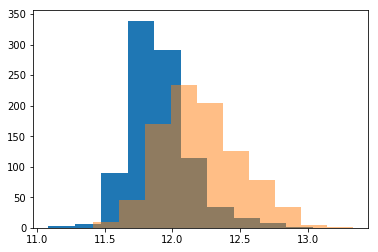

In [41]:
_ = plt.hist(np.log10(df['DM_massA']))
_ = plt.hist(np.log10(df['DM_massB']), alpha=0.5)

Text(0,0.5,'log Mstellar')

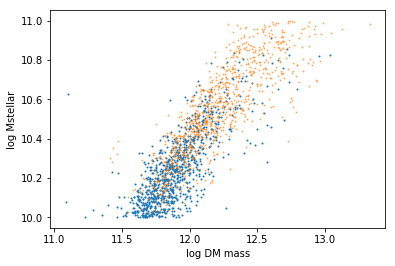

In [42]:
plt.scatter(np.log10(df['DM_massA']), np.log10(df['Stellar_massA']), s=1.0)
plt.scatter(np.log10(df['DM_massB']), np.log10(df['Stellar_massB']), s=1.0, alpha=0.5)
plt.xlabel('log DM mass')
plt.ylabel('log Mstellar')

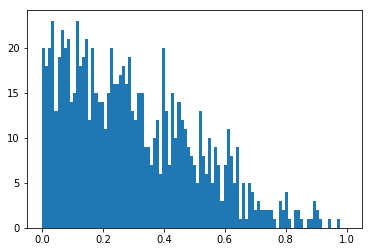

In [43]:
_ = plt.hist(np.log10(df['Stellar_massB'])-np.log10(df['Stellar_massA']), bins=np.linspace(0,1,100))

In [44]:
a = df['Position_A']
b = df['Position_B']
n = len(a)
d = np.ones(n)
for i in range(n):
    d[i] = np.sqrt(np.sum((np.array(a[i]) - np.array(b[i]))**2))

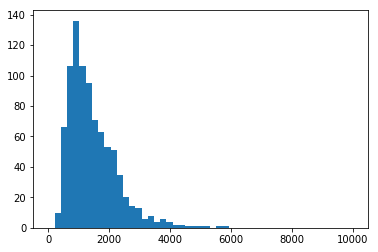

In [45]:
a = plt.hist(d, bins=np.linspace(0,10000,50))

(500, 4000)

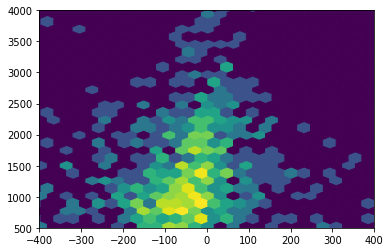

In [64]:
plt.hexbin(df['Radial_vel'], df['Distance'],gridsize=40, bins='log')
plt.xlim([-400,400])
plt.ylim([500,4000])

(500, 5000)

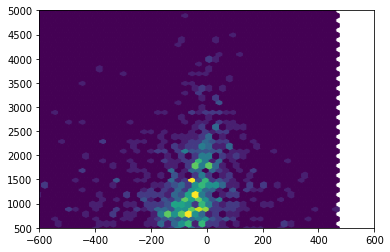

In [47]:
plt.hexbin(df['Radial_vel'], df['Distance'],gridsize=50)
plt.xlim([-600,600])
plt.ylim([500,5000])

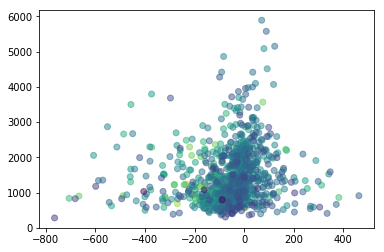

In [51]:
plt.scatter(df['Radial_vel'], df['Distance'], c=np.log10(df['DM_massA']+df['DM_massB']), alpha=0.5)

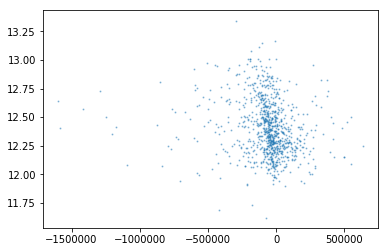

In [61]:
plt.scatter(df['Distance']*df['Radial_vel'], np.log10(df['DM_massA']+df['DM_massB']), alpha=0.4, s=1)